In [ ]:
!pip install kaggle

In [ ]:
!pip install pandas


In [ ]:
!pip install opendatasets

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"davidandreynugroho","key":"ae378ea2d8627f541e29cce578d5f067"}'}

In [ ]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)

# Pindahkan file kaggle.json ke direktori tersebut
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Atur izin file agar hanya bisa diakses oleh pengguna (privasi)
os.chmod('/root/.kaggle/kaggle.json', 0o600)


In [ ]:
!kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs

Dataset URL: https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs
License(s): CC0-1.0
100% 490M/492M [00:06<00:00, 38.4MB/s]
100% 492M/492M [00:06<00:00, 80.2MB/s]


In [ ]:
!unzip price-volume-data-for-all-us-stocks-etfs.zip -d /content/dataset

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: /content/dataset/Stocks/ergf.us.txt  
  inflating: /content/dataset/Stocks/erh.us.txt  
  inflating: /content/dataset/Stocks/eri.us.txt  
  inflating: /content/dataset/Stocks/eric.us.txt  
  inflating: /content/dataset/Stocks/erie.us.txt  
  inflating: /content/dataset/Stocks/erii.us.txt  
  inflating: /content/dataset/Stocks/erj.us.txt  
  inflating: /content/dataset/Stocks/erm.us.txt  
  inflating: /content/dataset/Stocks/ern.us.txt  
  inflating: /content/dataset/Stocks/eros.us.txt  
  inflating: /content/dataset/Stocks/eryp.us.txt  
  inflating: /content/dataset/Stocks/es.us.txt  
  inflating: /content/dataset/Stocks/esba.us.txt  
  inflating: /content/dataset/Stocks/esbk.us.txt  
  inflating: /content/dataset/Stocks/esca.us.txt  
  inflating: /content/dataset/Stocks/esdi.us.txt  
  inflating: /content/dataset/Stocks/esdiw.us.txt  
  inflating: /content/dataset/Stocks/ese.us.txt  
  inflating: /content/dataset/

In [ ]:
import os

# List the files in the extracted directory
os.listdir('/content/dataset')

['Data', 'Stocks', 'ETFs']

In [ ]:
# Open and read the first few lines of the .txt file to inspect the content
with open('/content/dataset/Stocks/sbux.us.txt', 'r') as file:
    lines = file.readlines()

# Display the first few lines
print(lines[:10])  # Adjust the number of lines displayed as needed

['Date,Open,High,Low,Close,Volume,OpenInt\n', '1992-06-26,0.30025,0.31388,0.29119,0.30486,246597602,0\n', '1992-06-29,0.30928,0.33204,0.30486,0.32755,64554605,0\n', '1992-06-30,0.33204,0.33662,0.31388,0.31388,38224879,0\n', '1992-07-01,0.31844,0.32755,0.30928,0.32302,20132424,0\n', '1992-07-02,0.32755,0.32755,0.31388,0.32302,15384206,0\n', '1992-07-06,0.31844,0.32302,0.31388,0.32302,6323918,0\n', '1992-07-07,0.32302,0.32302,0.31388,0.32302,11719296,0\n', '1992-07-08,0.32302,0.32302,0.31388,0.31388,17037297,0\n', '1992-07-09,0.31844,0.32755,0.31388,0.32755,4312079,0\n']


In [ ]:
import pandas as pd
import pandas as lag_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

# Load the comma-separated file
df = pd.read_csv('/content/dataset/Stocks/sbux.us.txt', delimiter=',')

# Display the first few rows
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1992-06-26,0.30025,0.31388,0.29119,0.30486,246597602,0
1,1992-06-29,0.30928,0.33204,0.30486,0.32755,64554605,0
2,1992-06-30,0.33204,0.33662,0.31388,0.31388,38224879,0
3,1992-07-01,0.31844,0.32755,0.30928,0.32302,20132424,0
4,1992-07-02,0.32755,0.32755,0.31388,0.32302,15384206,0


In [ ]:
# Display the first few rows
print(df.head())
print(df.shape)
print(df.columns)

         Date     Open     High      Low    Close     Volume  OpenInt
0  1992-06-26  0.30025  0.31388  0.29119  0.30486  246597602        0
1  1992-06-29  0.30928  0.33204  0.30486  0.32755   64554605        0
2  1992-06-30  0.33204  0.33662  0.31388  0.31388   38224879        0
3  1992-07-01  0.31844  0.32755  0.30928  0.32302   20132424        0
4  1992-07-02  0.32755  0.32755  0.31388  0.32302   15384206        0
(6393, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


<Figure size 1000x600 with 0 Axes>

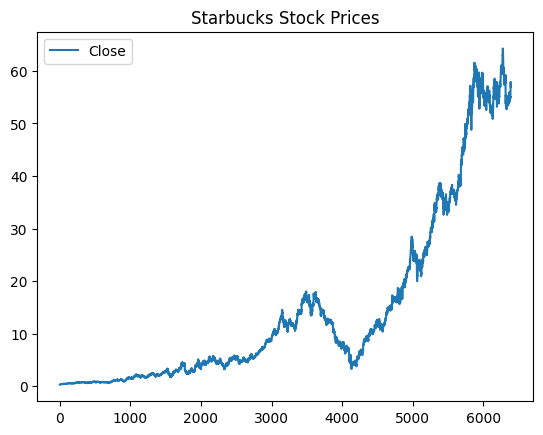

In [ ]:
plt.figure(figsize=(10, 6))
df[['Close']].plot()
plt.title("Starbucks Stock Prices")
plt.show()


Text(0.5, 1.0, 'Starbucks Cumulative Returns')

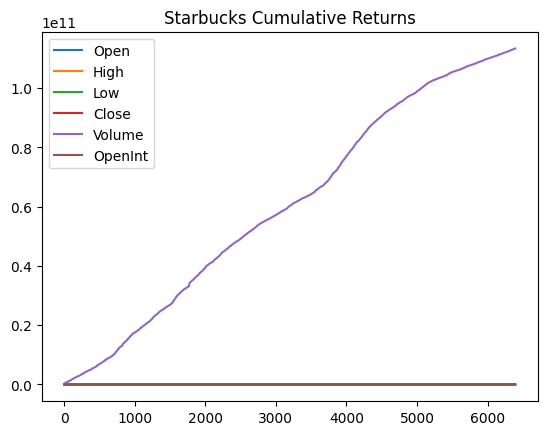

In [ ]:
dr = df.cumsum()
dr.plot()
plt.title('Starbucks Cumulative Returns')

Text(0.5, 1.0, 'Starbucks Autocorrelation plot')

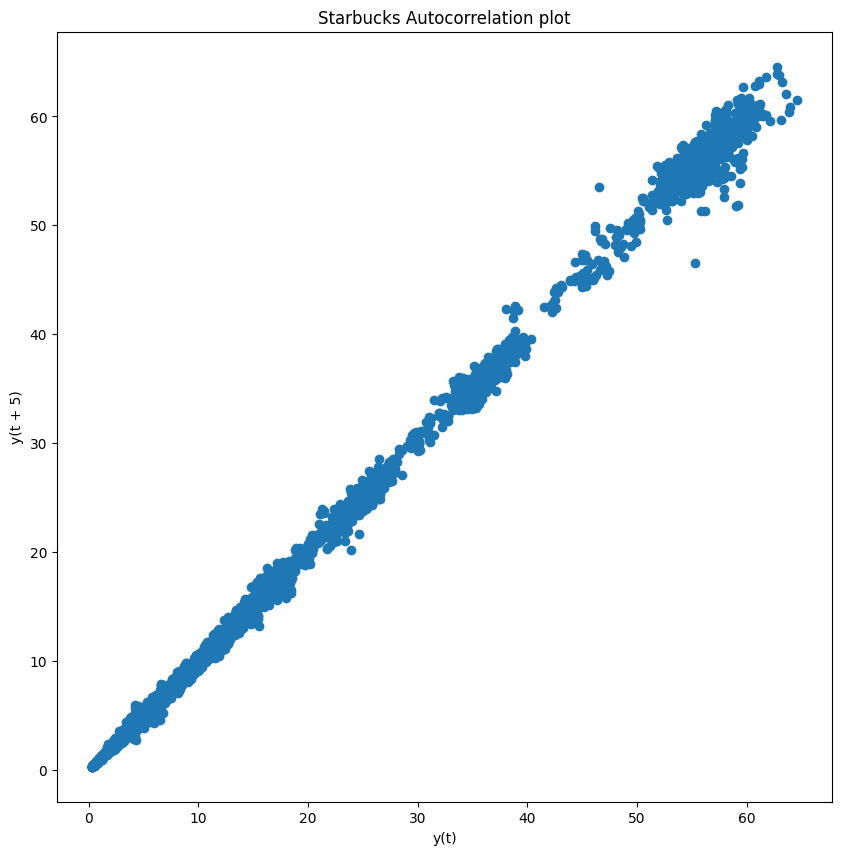

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Starbucks Autocorrelation plot')

In [ ]:
df['Date'][6301]

'2017-07-05'

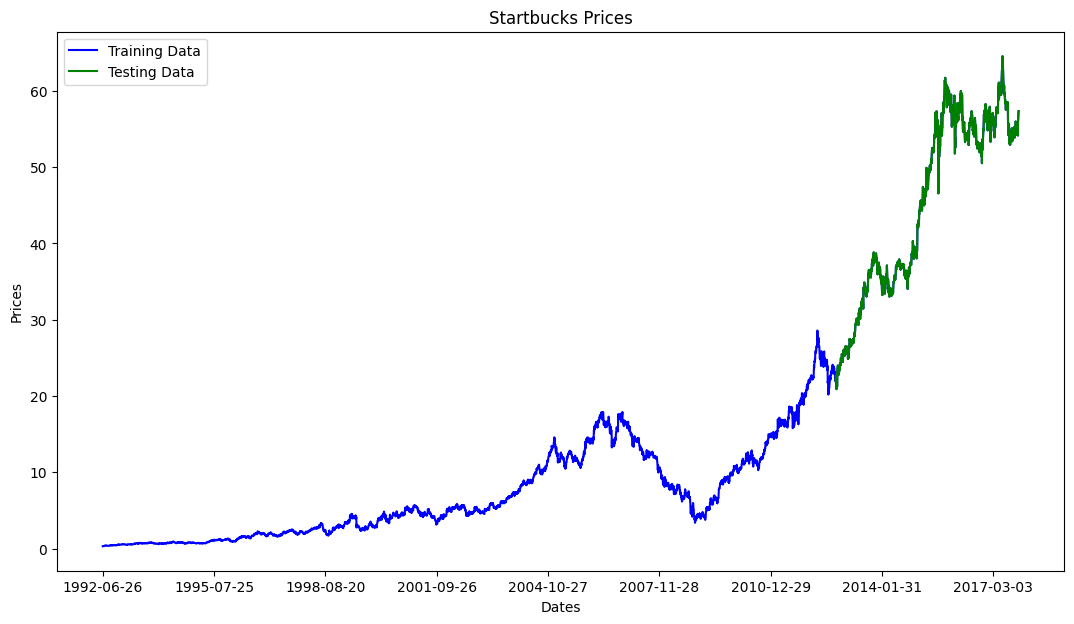

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(13,7))
plt.title('Startbucks Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,6301,777), df['Date'][0:6301:777])
plt.legend()

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Testing Mean Squared Error: 0.401
Symmetric mean absolute percentage error: 0.945


<ipython-input-51-e51c9f43078c>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Open'], 'green', color='blue', label='Training Data')


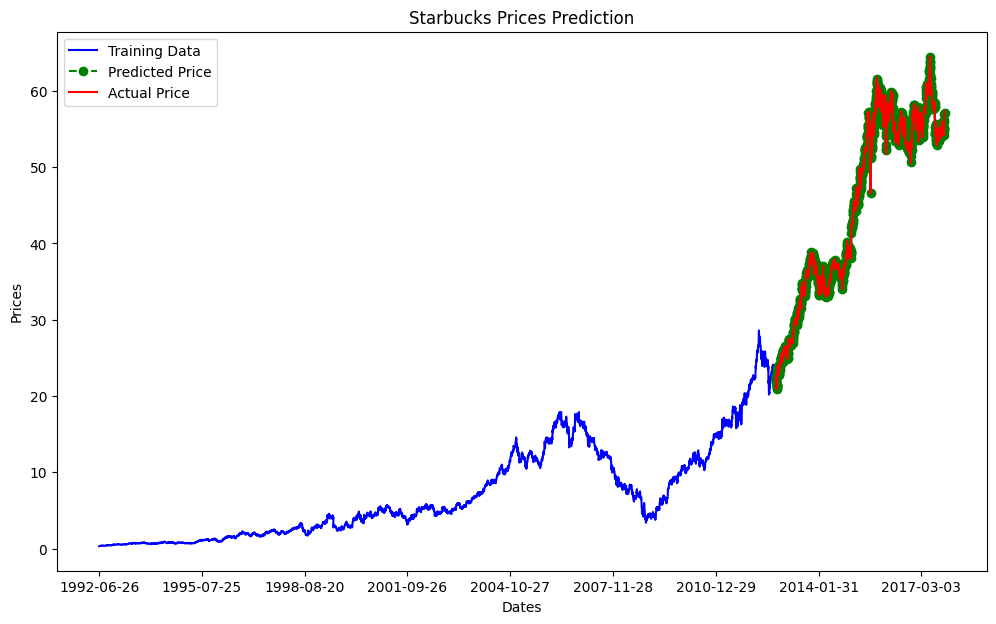

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Starbucks Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
num_ticks = 7
plt.xticks(np.arange(0,6301,777), df['Date'][0:6301:777])
plt.legend()

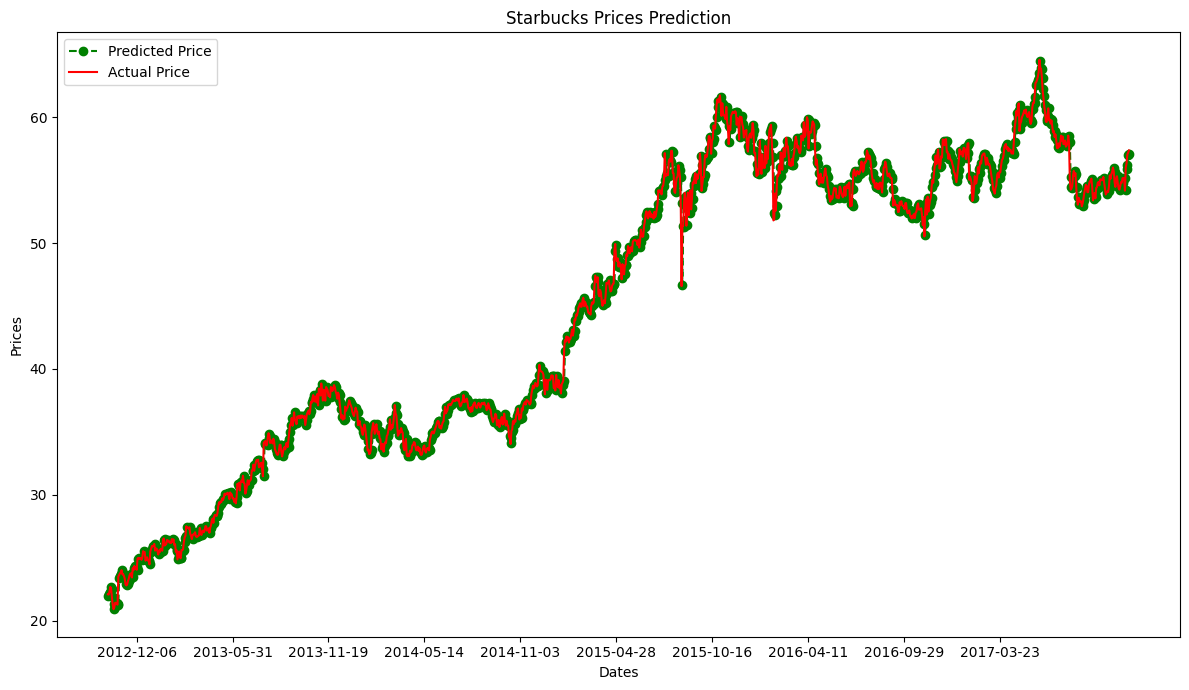

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(5150,6301, 120), df['Date'][5150:6301:120])
plt.title('Starbucks Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.tight_layout()
plt.legend()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.0039
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 3.8797e-05
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 4.5280e-05
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 91ms/step - loss: 3.5503e-05
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 4.0130e-05
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 141ms/step - loss: 3.4006e-05
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 3.7005e-05
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - loss: 3.7236e-05
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 3.1118e-05
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 3.2428e-05
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 3.2270e-05
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 2.9878e-05
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - loss: 2.6319e-05
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 3.0259e-05
Epoch 15/50

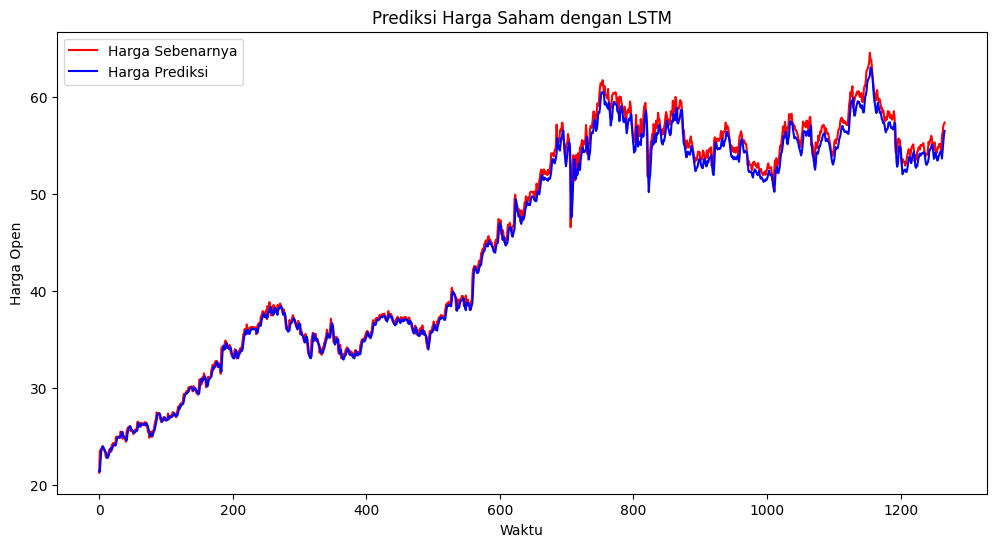

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Data Preprocessing
df = pd.read_csv('/content/dataset/Stocks/sbux.us.txt', delimiter=',')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Fokus pada kolom 'Open'
data = df[['Open']].values

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Membuat data time series
time_step = 60  # Menggunakan 60 hari sebelumnya untuk memprediksi 1 hari
X, y = [], []
for i in range(time_step, len(data_scaled)):
    X.append(data_scaled[i-time_step:i, 0])  # 60 data sebelumnya sebagai input
    y.append(data_scaled[i, 0])  # Data saat ini sebagai output
X, y = np.array(X), np.array(y)

# Reshape data menjadi [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Membagi dataset menjadi train dan test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Membuat model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, batch_size=64, epochs=50)

# 6. Prediksi data test
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Skala balik ke nilai asli
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))  # Skala balik y_test

# 7. Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, color='red', label='Harga Sebenarnya')
plt.plot(predicted, color='blue', label='Harga Prediksi')
plt.title('Prediksi Harga Saham dengan LSTM')
plt.xlabel('Waktu')
plt.ylabel('Harga Open')
plt.legend()
plt.show()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 0.0020 - val_loss: 9.5438e-04
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - loss: 3.9918e-05 - val_loss: 9.3728e-04
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 3.8237e-05 - val_loss: 9.7783e-04
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 3.5412e-05 - val_loss: 5.9664e-04
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 3.2163e-05 - val_loss: 2.9861e-04
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 3.2095e-05 - val_loss: 2.6032e-04
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 3.0010e-05 - val_loss: 0.0018
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 8.9044e-05 - val_loss: 0.0012
Epoch 9/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 2.6516e-05 - val_loss: 3.3868e-04
Epoch 10/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 2.3459e-05 - val_loss: 7.5008e-04
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.0661e-0

<ipython-input-7-6530b3308502>:64: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=len(future_predictions) + 1, freq='A')[1:]  # 'A' untuk tahunan


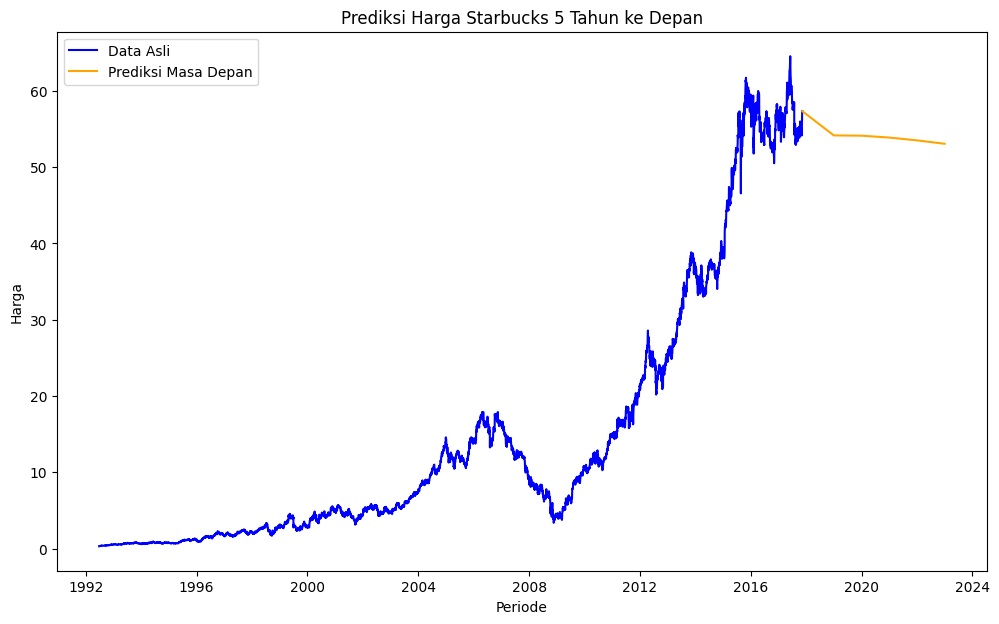

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load dataset
df = pd.read_csv('/content/dataset/Stocks/sbux.us.txt', delimiter=',')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Pilih fitur yang digunakan untuk prediksi
data = df[['Open']].values

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Membuat data sequence
sequence_length = 30  # Panjang sequence untuk LSTM
X, y = [], []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])
    y.append(data_scaled[i, 0])
X, y = np.array(X), np.array(y)

# Split data menjadi train dan test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data untuk LSTM (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Membangun model LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluasi model
loss = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

# Prediksi masa depan (5 periode ke depan)
future_predictions = []
last_sequence = X_test[-1]  # Gunakan sequence terakhir dari data test
for _ in range(5):  # Prediksi 5 periode
    next_step = model.predict(last_sequence.reshape(1, sequence_length, 1))
    future_predictions.append(next_step[0, 0])
    last_sequence = np.append(last_sequence[1:], next_step, axis=0)  # Update sequence

# Skala balik prediksi
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Gabungkan data asli dengan prediksi masa depan
extended_data = np.append(df['Open'].values, future_predictions)
future_dates = pd.date_range(start=df.index[-1], periods=len(future_predictions) + 1, freq='A')[1:]  # 'A' untuk tahunan
extended_index = np.append(df.index, future_dates)

# Visualisasi data asli dan prediksi masa depan
plt.figure(figsize=(12, 7))
plt.plot(extended_index[:len(df)], df['Open'], label="Data Asli", color="blue")
plt.plot(extended_index[len(df)-1:], extended_data[len(df)-1:], label="Prediksi Masa Depan", color="orange")
plt.title('Prediksi Harga Starbucks 5 Tahun ke Depan')
plt.xlabel('Periode')
plt.ylabel('Harga')
plt.legend()
plt.show()